In [1]:
import os
print(os.getcwd())  # Verify the new working directory

/home/ps41/ws/TAMU/CSCE633_ML/final_project/src


In [1]:
from preprocessing import merge_modalities

# Paths to your CSV files
img_path = "../data/img_train.csv"
cgm_path = "../data/cgm_train.csv"
viome_path = "../data/demo_viome_train.csv"
label_path = "../data/label_train.csv"

# Test the merge function
merged_data = merge_modalities(img_path, cgm_path, viome_path, label_path)

# Display the first few rows to verify the merged dataset
print(merged_data.head())

ModuleNotFoundError: No module named 'torchvision'

Processed Images Shape: (324, 64, 64, 3)


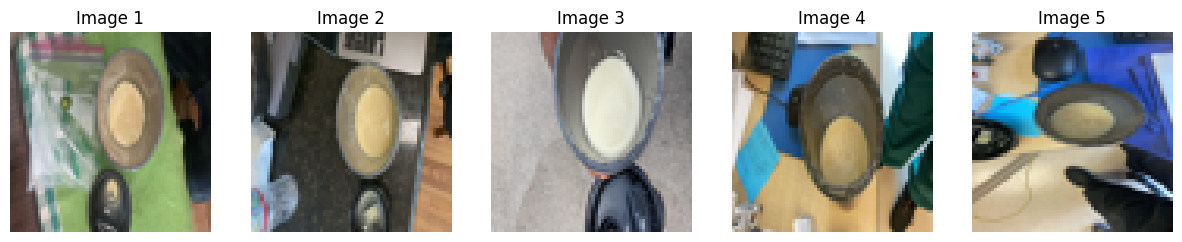

In [3]:
from preprocessing import preprocess_images
import matplotlib.pyplot as plt

# Example: Process the "Image Before Breakfast" column
image_column = merged_data["Image Before Breakfast"]
processed_images = preprocess_images(image_column)

# Verify the shape of the processed images
print(f"Processed Images Shape: {processed_images.shape}")

# Visualize a few images (including any placeholders)
num_images_to_visualize = 5
fig, axes = plt.subplots(1, num_images_to_visualize, figsize=(15, 5))

for i in range(num_images_to_visualize):
    axes[i].imshow(processed_images[i])  # Display the image
    axes[i].axis('off')
    axes[i].set_title(f"Image {i+1}")

plt.show()


In [4]:
from preprocessing import preprocess_cgm
# Process the "CGM Data" column
cgm_column = merged_data["CGM Data"]
processed_cgm = preprocess_cgm(cgm_column)

# Verify the shape of the processed CGM data
print(f"Processed CGM Data Shape: {processed_cgm.shape}")


Processed CGM Data Shape: (324, 16)


In [5]:
print(processed_cgm[:5])  # Display the first 5 processed rows

[[0.32241669 0.40916667 0.34169444 0.37663114 0.25882408 0.27256482
  0.30968519 0.27853704 0.33412036 0.38045369 0.16335185 0.29702779
  0.2709537  0.27874074 0.29454631 0.27278704]
 [0.34040278 0.37615018 0.31869428 0.30186109 0.30783333 0.30666667
  0.33237963 0.32332408 0.3065741  0.30640124 0.30622841 0.30605555
  0.3160185  0.33636111 0.32242594 0.32312965]
 [0.36091667 0.42371297 0.41255554 0.37063891 0.33388888 0.32974998
  0.32899076 0.33429629 0.32746297 0.37902779 0.42089813 0.41039815
  0.37535184 0.38308332 0.36645368 0.33535184]
 [0.35761111 0.3860185  0.4044352  0.37035187 0.34150002 0.31313891
  0.34055555 0.33783333 0.3618704  0.3500926  0.33333333 0.32125926
  0.3061574  0.29191668 0.28802778 0.28995372]
 [0.34333333 0.37981483 0.38036217 0.34444445 0.33395925 0.35385368
  0.35059074 0.34989443 0.3416037  0.37923332 0.3515611  0.35968333
  0.36104815 0.34651853 0.32750369 0.33492963]]


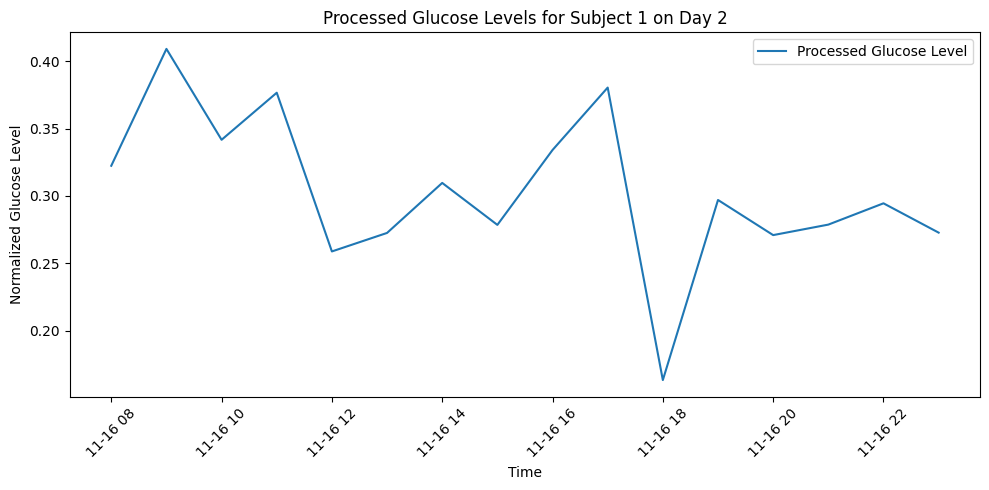

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Example: Select a single processed CGM row for a subject and day
subject_id = merged_data['Subject ID'][0]
day = merged_data['Day'][0]

# Extract the processed CGM data for the subject and day
processed_cgm_row = processed_cgm[0]  # Assuming the first row corresponds to this subject and day

# Generate time intervals based on resampling frequency
time_intervals = pd.date_range(start="08:00", periods=len(processed_cgm_row), freq="H")

# Plot the processed CGM data
plt.figure(figsize=(10, 5))
plt.plot(time_intervals, processed_cgm_row, label="Processed Glucose Level")
plt.xlabel("Time")
plt.ylabel("Normalized Glucose Level")
plt.title(f"Processed Glucose Levels for Subject {subject_id} on Day {day}")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
from preprocessing import preprocess_demo_viome

# Pass the demographic and microbiome data to the preprocessing function
processed_demo_viome = preprocess_demo_viome(merged_data)

# Verify the output
print(f"Processed Demographic and Microbiome Data Shape: {processed_demo_viome.shape}")
processed_demo_viome.head()

Processed Demographic and Microbiome Data Shape: (324, 54)


,Age,Weight,Height,BMI,A1C,Baseline Fasting Glucose,Insulin,Triglycerides,Cholesterol,HDL,...,Viome_26,Viome_27,Gender_0,Gender_1,Race_African American,Race_Hispanic/Latino,Race_White,Diabetes Status_1,Diabetes Status_2,Diabetes Status_3
0,-2.12132,-1.393944,0.260163,-1.366764,-0.931655,-1.036424,-1.40564,-0.544819,0.62421,1.304817,...,-0.199544,-0.036756,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,-2.12132,-1.393944,0.260163,-1.366764,-0.931655,-1.036424,-1.40564,-0.544819,0.62421,1.304817,...,-0.199544,-0.036756,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,-2.12132,-1.393944,0.260163,-1.366764,-0.931655,-1.036424,-1.40564,-0.544819,0.62421,1.304817,...,-0.199544,-0.036756,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,-2.12132,-1.393944,0.260163,-1.366764,-0.931655,-1.036424,-1.40564,-0.544819,0.62421,1.304817,...,-0.199544,-0.036756,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,-2.12132,-1.393944,0.260163,-1.366764,-0.931655,-1.036424,-1.40564,-0.544819,0.62421,1.304817,...,-0.199544,-0.036756,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [8]:
print(merged_data.columns)
print(processed_demo_viome.columns)

Index(['Subject ID', 'Day', 'Breakfast Fiber', 'Lunch Fiber',
       'Image Before Breakfast', 'Image Before Lunch', 'Breakfast Time',
       'Lunch Time', 'CGM Data', 'Age', 'Gender', 'Weight', 'Height', 'Race',
       'Diabetes Status', 'A1C', 'Baseline Fasting Glucose', 'Insulin',
       'Triglycerides', 'Cholesterol', 'HDL', 'Non-HDL', 'LDL', 'VLDL',
       'CHO/HDL Ratio', 'HOMA-IR', 'BMI', 'Viome', 'Breakfast Calories',
       'Lunch Calories', 'Breakfast Carbs', 'Lunch Carbs', 'Breakfast Fat',
       'Lunch Fat', 'Breakfast Protein', 'Lunch Protein'],
      dtype='object')
Index(['Age', 'Weight', 'Height', 'BMI', 'A1C', 'Baseline Fasting Glucose',
       'Insulin', 'Triglycerides', 'Cholesterol', 'HDL', 'Non-HDL', 'LDL',
       'VLDL', 'CHO/HDL Ratio', 'HOMA-IR', 'Breakfast Fiber', 'Lunch Fiber',
       'Breakfast Time', 'Lunch Time', 'Viome_1', 'Viome_2', 'Viome_3',
       'Viome_4', 'Viome_5', 'Viome_6', 'Viome_7', 'Viome_8', 'Viome_9',
       'Viome_10', 'Viome_11', 'Viome_12

In [9]:
print(processed_demo_viome.isnull().sum())

Age                         0
Weight                      0
Height                      0
BMI                         0
A1C                         0
Baseline Fasting Glucose    0
Insulin                     0
Triglycerides               0
Cholesterol                 0
HDL                         0
Non-HDL                     0
LDL                         0
VLDL                        0
CHO/HDL Ratio               0
HOMA-IR                     0
Breakfast Fiber             0
Lunch Fiber                 0
Breakfast Time              0
Lunch Time                  0
Viome_1                     0
Viome_2                     0
Viome_3                     0
Viome_4                     0
Viome_5                     0
Viome_6                     0
Viome_7                     0
Viome_8                     0
Viome_9                     0
Viome_10                    0
Viome_11                    0
Viome_12                    0
Viome_13                    0
Viome_14                    0
Viome_15  